# Importing libraries

In [1]:
import tensorflow as tf
from tensorflow import keras


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

# Load the dataset and split it into train and test data set 

In [3]:
#load data
mnist=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [4]:
#too see length of training dataset
len(x_train)

60000

In [5]:
#too see length of testing dataset
len(x_test)

10000

In [6]:
#too see shape of training dataset
x_train.shape

(60000, 28, 28)

In [7]:
#too see shape of testing dataset
x_test.shape

(10000, 28, 28)

In [8]:
#too see the 1st image
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

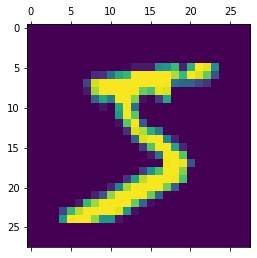

In [9]:
# too see the look of 1st image
plt.matshow(x_train[0])

In [10]:
#preprocessing the image
x_train=x_train/255
x_test=x_test/255

In [11]:
#too see the image after normalization
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

# create the  architecture / model

In [12]:
model=keras.Sequential([
    
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation="relu"),
    
    keras.layers.Dense(10,activation="softmax"),
    
])

In [13]:
#too see how the model is created
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [14]:
#compling the model
model.compile(
        optimizer='sgd',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']

)

# Training the model


In [15]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6635 - accuracy: 0.8290 - val_loss: 0.3548 - val_accuracy: 0.9062
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3318 - accuracy: 0.9081 - val_loss: 0.2884 - val_accuracy: 0.9193
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2817 - accuracy: 0.9213 - val_loss: 0.2576 - val_accuracy: 0.9282
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2511 - accuracy: 0.9304 - val_loss: 0.2318 - val_accuracy: 0.9325
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2281 - accuracy: 0.9362 - val_loss: 0.2131 - val_accuracy: 0.9390
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2093 - accuracy: 0.9413 - val_loss: 0.1953 - val_accuracy: 0.9426
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1942 - accuracy: 0.9457 - val_loss: 0.1826 - val_accuracy:

# Evaluating model


In [16]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print('Loss= % .3f' % test_loss)

print('accuracy=%.3f'%test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1560 - accuracy: 0.9549
Loss=  0.156
accuracy=0.955


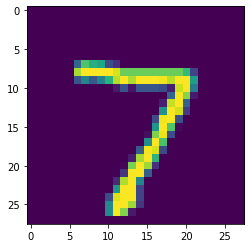

In [17]:
#making prediction on new data
n=random.randint(0,9999)
plt.imshow(x_test[0])
plt.show()

In [19]:
#use of predict() on new data
predicted_value=model.predict(x_test)
print("handwritten value in image is %d" % np.argmax(predicted_value[n]))

313/313 [==============================] - 0s 1ms/step
handwritten value in image is 7


# ploting the loss and accuracy

In [21]:
#too see the keys of dictionary
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

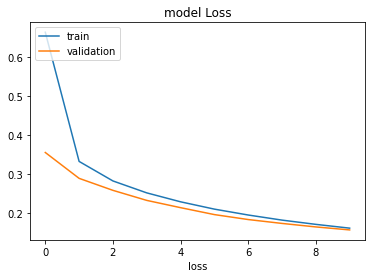

In [29]:
#loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model Loss')
plt.legend(['train','validation'],loc='upper left')
plt.xlabel('epoch')
plt.xlabel('loss')
plt.show()

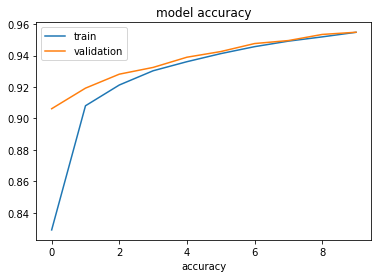

In [30]:
#accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.legend(['train','validation'],loc='upper left')
plt.xlabel('epoch')
plt.xlabel('accuracy')
plt.show()

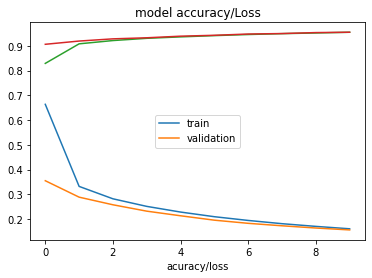

In [32]:
#loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy/Loss')
plt.legend(['train','validation'],loc='center')
plt.xlabel('epoch')
plt.xlabel('acuracy/loss')
plt.show()